<a href="https://colab.research.google.com/github/andrerizzo/Image_Recognition_CNN/blob/master/Convolutional_Neural_Networks_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks Deep Dive


<br>

### What are Convolutional Neural Networks (CNNs) ?

Convolutional Neural Networks (CNNs) are a type of deep neural network designed to process data with a grid-like structure, such as images and time series. They use convolutional layers to automatically extract relevant features from the input data, reducing the need for manual preprocessing.


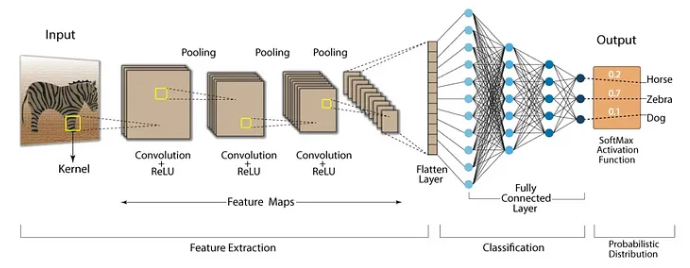
<figcaption>Source: https://medium.com/analytics-vidhya/convolution-operations-in-cnn-deep-learning-compter-vision-128906ece7d3</figcaption>

<br>

### What Are the Types of CNNs?  
There are several types of CNNs, each optimized for different applications. Some of the main ones include:

- **LeNet-5 (1998)** – One of the first CNNs, designed for handwritten digit recognition.  
- **AlexNet (2012)** – Popularized the use of deep networks with ReLU and dropout.  
- **VGGNet (2014)** – Uses deep convolutional layers with small filters (3x3).  
- **GoogLeNet/Inception (2014)** – Introduced Inception modules to capture different scales.  
- **ResNet (2015)** – Utilizes residual connections for extremely deep networks (50+ layers).  
- **YOLO (You Only Look Once - 2015)** – Optimized for real-time object detection.  
- **U-Net (2015)** – Used for medical image segmentation.
- **DenseNet (2017)** – Connects all convolutional layers to improve information flow.  
  

<br>

### CNNs Architecture    

1. **Convolutional Layers:**

- These layers apply convolutional operations to the input. But what is convolution ? It involves sliding a filter (or kernel) over the input data to extract features like edges, corners, or textures.    
- The output of this operation is called a feature map.  
- Convolution is the heart of the CNN, allowing that the network detects patterns in different image regions, making then ideal for image recognition.







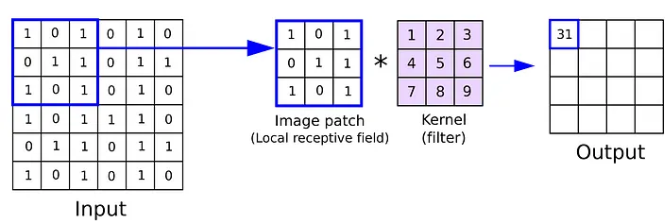
<figcaption>Source: https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243 </figcaption>

  
  - Key Parameters of convolutional layers:
    - *Kernel size:* Dimensions of the filter (e.g., 3x3 or 5x5).  
    - *Stride:* Stride determines how the filter convolves over the input matrix, i.e. how many pixels shift. When you set the stride to 1, the filter moves across one pixel at a time, and when you set the stride to 2, the filter moves across two pixels at a time. The smaller the stride value, the smaller the output, and vice versa (Kalita 2025).  
    - *Padding:* is the addition of extra pixel rows/columns around the borders of an input image. With padding, it is possible to mantain the image siza even after convolution.  

<br>

2. **Activation Function:**  

  Activation functions introduce non-linearity into CNNs, enabling them to learn complex patterns beyond simple linear transformations. Key roles include:

  - *Feature Extraction* – Helps CNNs detect hierarchical patterns from edges to objects.  
  - *Gradient Flow Control* – Prevents vanishing gradients (e.g., ReLU, Leaky ReLU).  
  - *Efficient Learning*  – Regulates information flow, improves computational efficiency, and reduces overfitting.


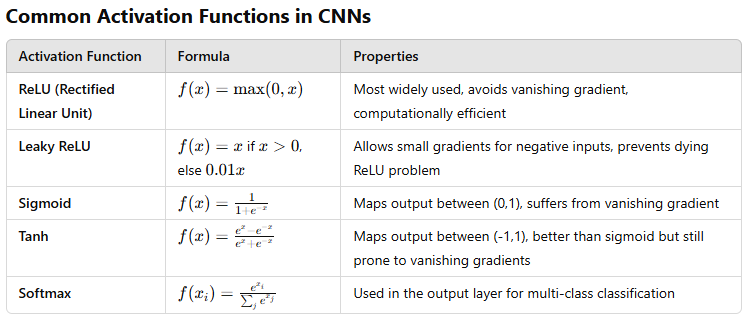

- **Choosing the Right Activation Function**  

  - **Hidden layers:**
    - *ReLU* (or its variants like Leaky ReLU) is usually the best choice due to efficiency and strong gradient flow.  
  - **Output layer:**   
    - *Sigmoid* for binary classification.  
    - *Softmax* for multi-class classification.  
    - *Linear* (no activation) for regression tasks.

<br>

3. **Pooling Layers:**  

  These layers reduce the spatial dimensions of the feature maps (e.g., height and width) while retaining important information.  

  Types:  
  Max pooling: Takes the maximum value in a pooling window (e.g., 2x2).  
  Average pooling: Takes the average value in a pooling window.  

  Benefits:  
  Reduces computational cost, controls overfitting, and retains essential features.  


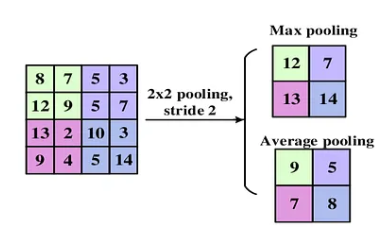
<figcaption>Source: https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243 </figcaption>

<br>

4. **Fully Connected Layers (Dense Layers):**  

  After feature extraction, the output is flattened and passed through one or more fully connected layers to make final predictions.  
  This layer combines features learned by the convolutional layers for classification or regression tasks.  
  
  How do they work ?  
  - **Flattening:** The outputs from convolutional and pooling layers are converted into a one-dimensional vector.  
  - **Fully Connected Neurons:** Each neuron is connected to every neuron in the previous layer, forming a dense network.  
  - **Probability Calculation:** Uses activation functions (such as Softmax or Sigmoid) to determine the final class of the image.  


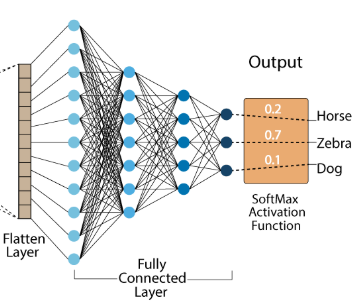
<figcaption>Source: https://www.analyticsvidhya.com/blog/2022/03/basics-of-cnn-in-deep-learning/</figcaption>

<br>

5. **Dropout**

  Regularization technique to prevent overfitting by randomly setting a fraction of the layer’s neurons to zero during training.

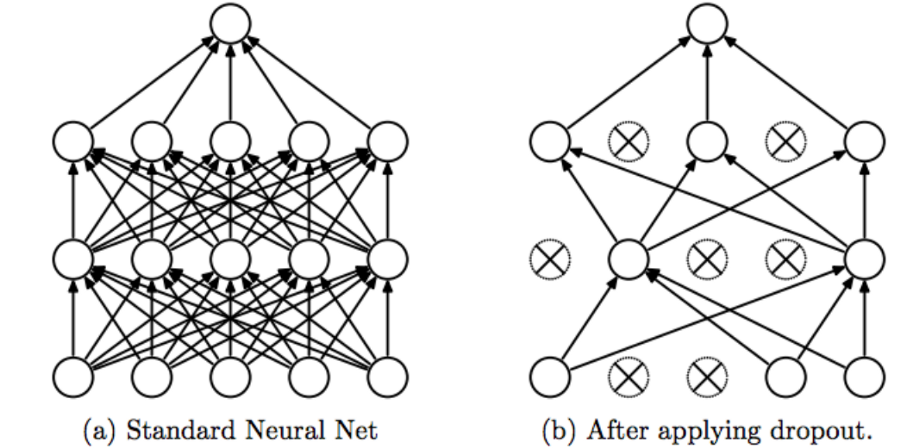  
<figcaption>Source: https://colab.research.google.com/drive/1-PrZ4ogfd_-wyhEcwaO1E0MdkKDYsBbN?authuser=1#scrollTo=i3HbvhX-8dJ5</figcaption>  

<br>

---   


## Practical Problem

### Install required library

In [1]:
!pip install imgaug

### Load required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

from imgaug import augmenters as iaa

from google.colab import files

import tarfile

### Download dataset CIFAR-100 from University of Toronto

In [3]:
!wget 'https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz'

--2025-02-14 01:37:16--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  15.9MB/s    in 12s     

2025-02-14 01:37:29 (13.9 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]



### Extract *tar.gz* files

In [4]:
# Path to the .tar.gz file
tar_file_path = "/content/cifar-100-python.tar.gz"

# Extract to a specific folder
extract_folder = "/content"

# Open the tar file
with tarfile.open(tar_file_path, "r:gz") as tar:
    tar.extractall(path=extract_folder)  # Extract all contents
    print("Extraction complete!")

Extraction complete!


### Read data from Pickle format

In [72]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train_data = unpickle("/content/cifar-100-python/train")
test_data = unpickle("/content/cifar-100-python/test")

### Separate train images, train labels, test images, test labels

In [73]:
X_train = train_data[b'data']
y_train = train_data[b'fine_labels']
X_test = test_data[b'data']
y_test = test_data[b'fine_labels']

### Data Analysis

#### Analyse dataset shape

In [37]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (50000, 3072)
X_test shape: (10000, 3072)


In [38]:
print('y_train length: ', len(y_train))
print('y_test length: ', len(y_test))

y_train length:  50000
y_test length:  10000


#### Analyse data structures

In [39]:
print('X_train:', type(X_train))
print('y_train:', type(y_train))
print('X_test:', type(X_test))
print('y_test:', type(y_test))

X_train: <class 'numpy.ndarray'>
y_train: <class 'list'>
X_test: <class 'numpy.ndarray'>
y_test: <class 'list'>


#### Analyse data types

In [40]:
print('X_train object type: ', X_train.dtype)
print('X_test object type: ', X_test.dtype)

X_train object type:  uint8
X_test object type:  uint8


In [41]:
def get_element_types(lst):
    return set(type(x) for x in lst)

print('y_train object type:', get_element_types(y_train))
print('y_test object type:', get_element_types(y_test))

y_train object type: {<class 'int'>}
y_test object type: {<class 'int'>}


#### Analyse if trining classes are imbalanced

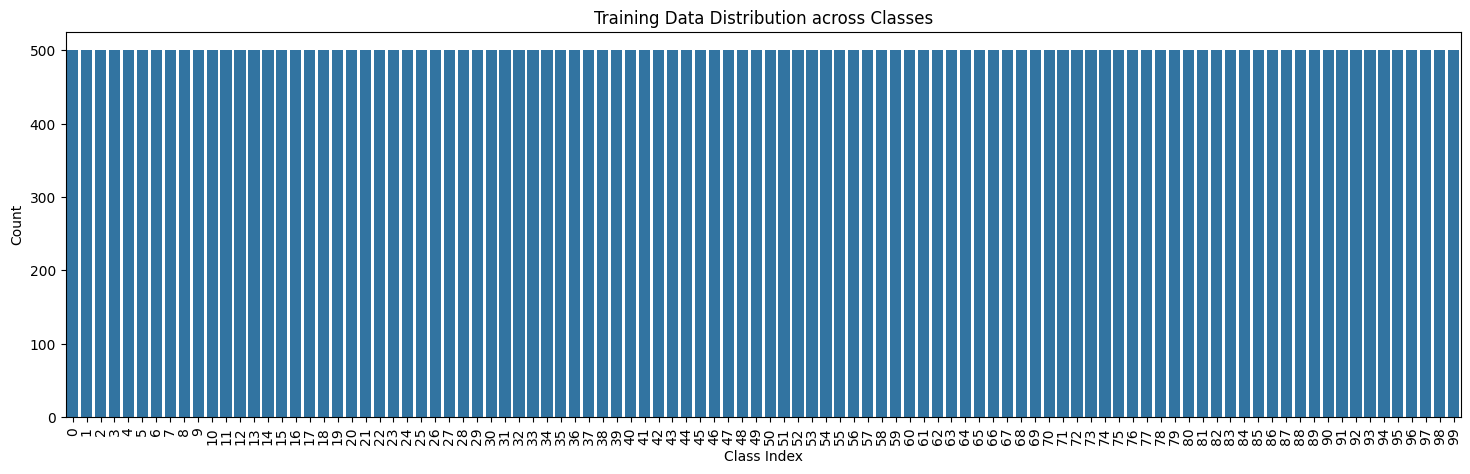

In [51]:
# Convert labels into a Pandas DataFrame
df_train = pd.DataFrame(y_train, columns=['label'])

# Count occurrences of each label
train_counts = df_train['label'].value_counts().sort_index()

# Plot class distribution
plt.figure(figsize=(18, 5))
sns.barplot(x=train_counts.index, y=train_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.title("Training Data Distribution across Classes")
plt.show()

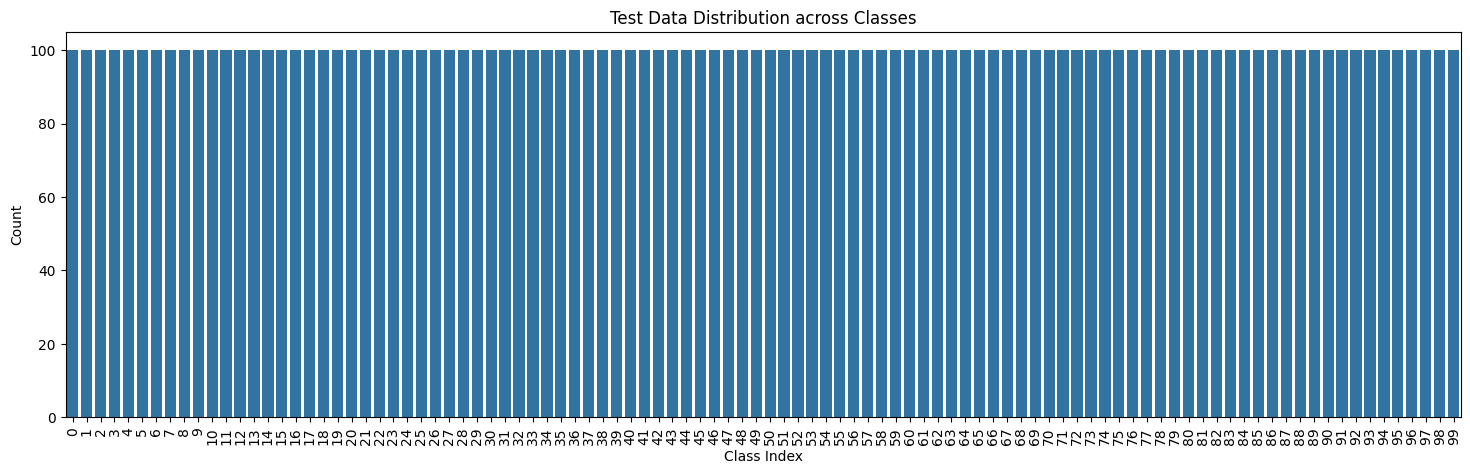

In [47]:
# Convert labels into a Pandas DataFrame
df_test = pd.DataFrame(y_test, columns=['label'])

# Count occurrences of each label
test_counts = df_test['label'].value_counts().sort_index()

# Plot class distribution
plt.figure(figsize=(18, 5))
sns.barplot(x=test_counts.index, y=test_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Class Index")
plt.ylabel("Count")
plt.title("Test Data Distribution across Classes")
plt.show()

#### **Dataset Analysis**  

- X_train
  - 50000 images distributed between 100 classes each one with 500 pictures.  
  - NumPy array data structure with integer data type.
  - **Actions:**   
    - Reshape to a 4D tensor(50000, 32, 32, 3) to be used by Keras.  
    - Convert the 4D tensor data type to float32.  

- X_test
  - 10000 images distributed between 100 classes each one with 100 pictures.  
  - NumPy array data structure with integer data type.
  - **Actions:**  
    - Reshape to a 4D tensor(50000, 32, 32, 3) to be used by Keras.  
    - Convert the 4D tensor data type to float32.

- y_train
  - 50000 labels distributed between 100 classes each one with 500 labels.  
  - List data structure with integer data type.    
  - **Action:**  
    - Convert the list data structure to a NumPy array to be used by Keras.

- y_test
  - 10000 labels distributed between 100 classes each one with 100 labels.  
  - List data structure with integer data type.    
  - **Action:**  
    - Convert the list data structure to a NumPy array to be used by Keras.

---  

<br>

### Pre-processing



#### Convert X_train and X_test from a *Numpy array* to a *4D tensor* and transform data type from *int* to *float*



In [74]:
X_train = X_train.reshape(50000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32')
X_test = X_test.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float32')

#### Convert y_train and y_test from list to a NumPy array

In [75]:
y_train = np.array(y_train)
y_test = np.array(y_test)

- Keras pre-requisites  
  - Images must be stored in 4D tensors (Numpy array) and labels in 1D tensor (NumPy array also).
  - The input shape of the first convolutional layer must be in "channels-last" format (height, width, channels), rather than "channels-first" format (channels, height, width) used in frameworks like PyTorch.  


#### Analyse dataset after feature engineering

In [76]:
print('X_train data structure: ', type(X_train))
print('X_train data type: ', X_train.dtype)
print('X_train shape: ', X_train.shape)

print('\ny_train data structure: ', type(y_train))
print('y_train data type: ', y_train.dtype)
print('y_train shape: ', y_train.shape)

print('\nX_test data structure: ', type(X_test))
print('X_test data type: ', X_test.dtype)
print('X_test shape: ', X_test.shape)

print('\ny_test data structure: ', type(y_test))
print('y_test data type: ', y_test.dtype)
print('y_test shape: ', y_test.shape)


X_train data structure:  <class 'numpy.ndarray'>
X_train data type:  float32
X_train shape:  (50000, 32, 32, 3)

y_train data structure:  <class 'numpy.ndarray'>
y_train data type:  int64
y_train shape:  (50000,)

X_test data structure:  <class 'numpy.ndarray'>
X_test data type:  float32
X_test shape:  (10000, 32, 32, 3)

y_test data structure:  <class 'numpy.ndarray'>
y_test data type:  int64
y_test shape:  (10000,)


#### Analyse image maximun and minimun pixel intensity

In [77]:
X_train[0].max()

255.0

In [78]:
X_train[0].min()

1.0

It becomes evident that if the maximum intensity for each color is 255, dividing all color's values by 255 will transform the range from [0, 255] to [0, 1].  That is **Normalization**.



<br>

#### RGB color schema
To understand what will be done, let's delve into the RGB color scheme.  

The RGB (Red, Green, Blue) standard is an additive model used to represent colors by combining three primary colors: red, green, and blue. It is widely used in digital displays, such as monitors, televisions, and cameras, because these devices emit light to create colors.  

#### Color Representation in RGB  
In the RGB model, each color is represented by three values corresponding to the intensity of red, green, and blue.  
These values range from 0 to 255 for each color.
Example:  
* RGB(255, 0, 0) - Pure or 100% red  
* RGB(0, 255, 0) - Pure or 100% green  
* RGB(0, 0, 255) - Pure or 100% blue  

But it is possible to have also combination os two or more colors to form a third one.  
Example:  
* RGB(255, 255, 255): Pure or 100% white
* RGB(0, 0, 0): Black
* RGB(128, 128, 0): Half red and half green that is light yellow.  

#### Normalization

In [80]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Maximum after normalization

In [66]:
X_train[0].max()

0.83137256

#### Minimum after normalization

In [67]:
X_train[0].min()

0.050980393

<br>

#### Create train and validation sets  

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### View 30 images

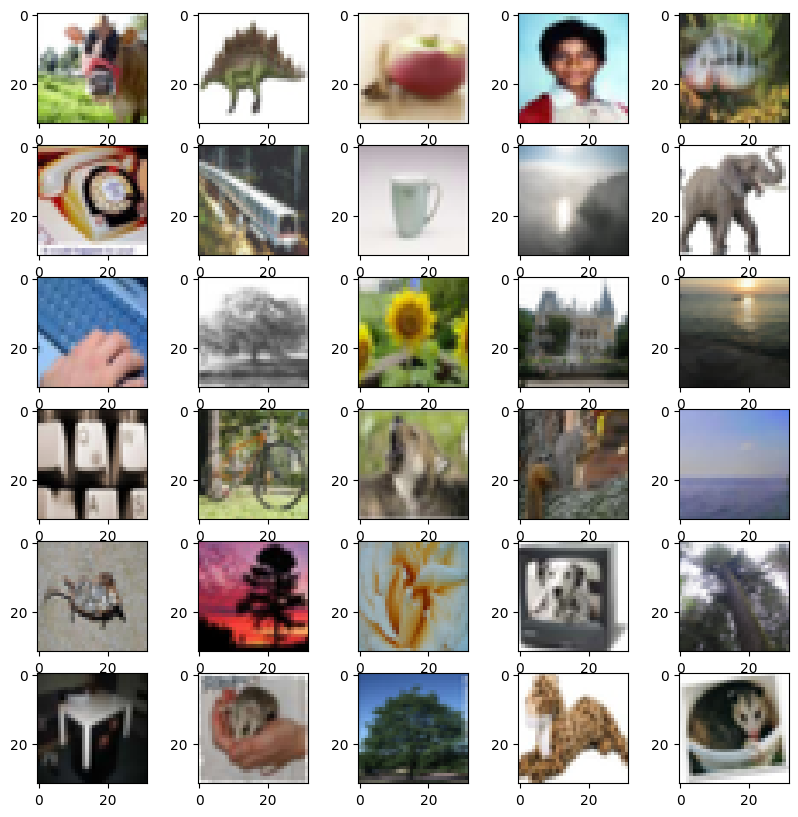

In [81]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(X_train[i])

As we can see images resolution are not good and some of them are almost unrecognizable.  

### View some individual images

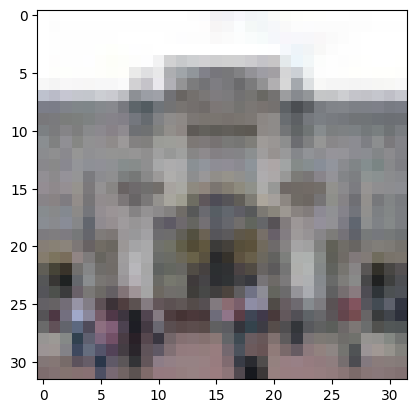

In [86]:
plt.imshow(X_train[20])
plt.show()

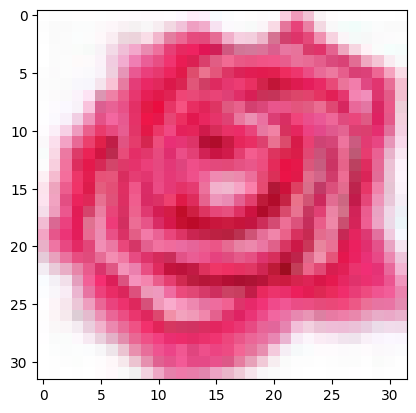

In [87]:
plt.imshow(X_train[1000])
plt.show()

<br>

---

### Model training  

&nbsp; The objective here will be use different architectures (VGG16, ResNet) and validate wich one will have the best performance.  

&nbsp; For this task will be used the transfer learning approach.  

<br>

### VGG16 Architecture  



#### Creation

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Model overview

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,459,300 (9.38 MB)

 Trainable params: 2,459,300 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

#### Model training

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0696 - loss: 5.3895 - val_accuracy: 0.1922 - val_loss: 3.4074
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2035 - loss: 3.3237 - val_accuracy: 0.2100 - val_loss: 3.3413
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2606 - loss: 3.0192 - val_accuracy: 0.2319 - val_loss: 3.2010
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3065 - loss: 2.7754 - val_accuracy: 0.2391 - val_loss: 3.2120
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3597 - loss: 2.5402 - val_accuracy: 0.2414 - val_loss: 3.3569
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4127 - loss: 2.2627 - val_accuracy: 0.2521 - val_loss: 3.4545
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4808 - loss: 1.9761 - val_accuracy: 0.2375 - val_loss: 3.6413
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5479 - loss: 1.7024 -

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### Model accuracy and loss

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nModel loss using test set:', test_loss)
print('\nModel accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2123 - loss: 10.3560

Model loss using test set: 10.373266220092773

Model accuracy using test set: 0.2079000025987625


#### Graphical Analysis

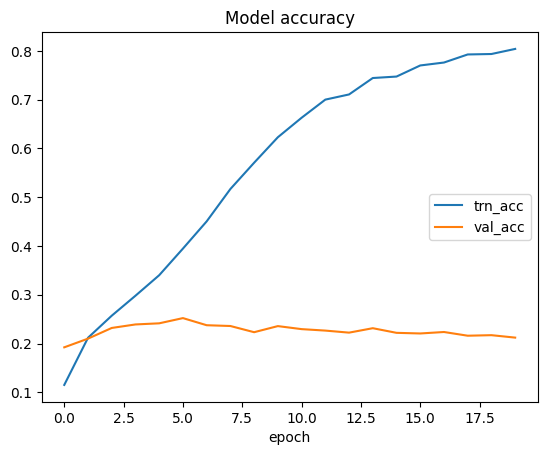

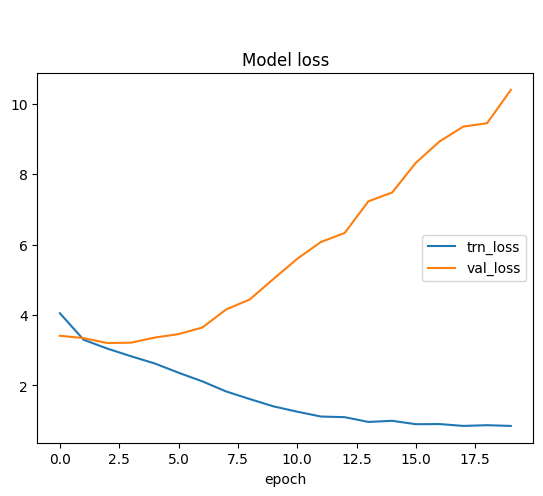

In [ ]:
plt.title('Model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

In [ ]:
#keras.models.save_model(model, 'CNN_v1.keras')
#files.download('CNN_v1.keras')

In [ ]:
#keras.models.load_model('CNN_v1.keras')

The poor performance caused by overfitting.

<br>

---
### Model 2

Changes:
* Introduce *dropout*.

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model2.add(keras.layers.Dropout(0.2))

model2.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu') )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model2.add(keras.layers.Dropout(0.2))

model2.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model2.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model2.add(keras.layers.Dropout(0.2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(1024, activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(100, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,459,300 (9.38 MB)

 Trainable params: 2,459,300 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model2.fit(train_images, train_labels, epochs=20, validation_split=0.20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0204 - loss: 6.5905 - val_accuracy: 0.0703 - val_loss: 4.1602
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0852 - loss: 4.0261 - val_accuracy: 0.1268 - val_loss: 3.8175
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1327 - loss: 3.7161 - val_accuracy: 0.1612 - val_loss: 3.5866
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1527 - loss: 3.6212 - val_accuracy: 0.1779 - val_loss: 3.5159
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1691 - loss: 3.5225 - val_accuracy: 0.1879 - val_loss: 3.4791
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1778 - loss: 3.4627 - val_accuracy: 0.1880 - val_loss: 3.4901
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1813 - loss: 3.4429 - val_accuracy: 0.1477 - val_loss: 3.6296
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1897 - loss: 3.3976 -

In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('\nModel 2 loss using test set:', test_loss)
print('\nModel 2 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2101 - loss: 3.3944

Model 2 loss using test set: 3.3957812786102295

Model 2 accuracy using test set: 0.20909999310970306


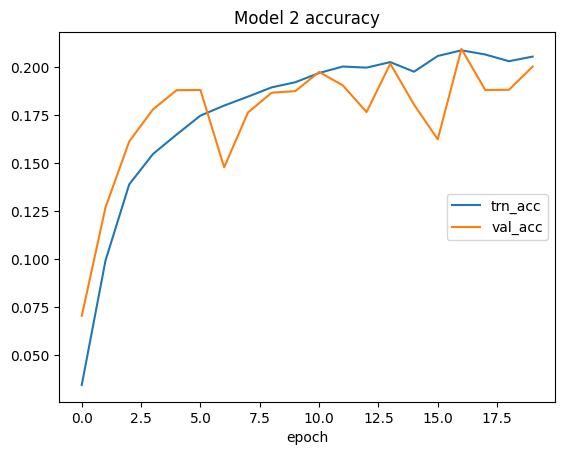

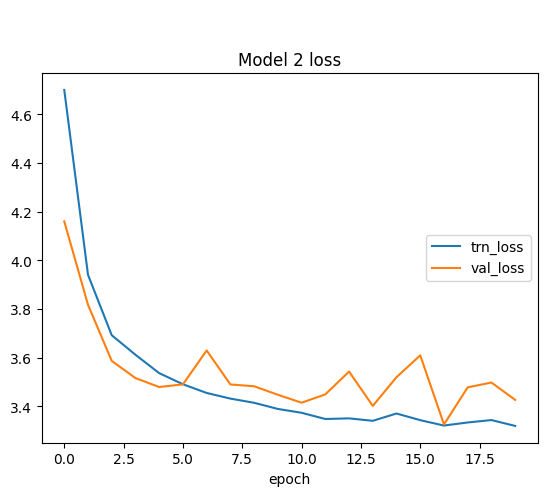

In [ ]:
plt.title('Model 2 accuracy')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel 2 loss')
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

Model 2 performed better than Model 1, but further improvements will be necessary.


<br>

---

### Model 3  

Changes:

* Remove dropout from convolutional layers but retain it in dense layers.
* Apply batch normalization to convolutional layers.




**Batch Normalization**  

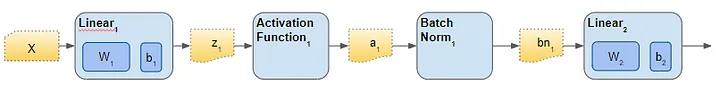

**What is Batch Normalization?**  
Batch Normalization is a technique used to improve the training of deep neural networks by normalizing the inputs to a given layer across the mini-batch of training data. It was introduced by Sergey Ioffe and Christian Szegedy in 2015 as a way to address issues related to internal covariate shift.  
<br>



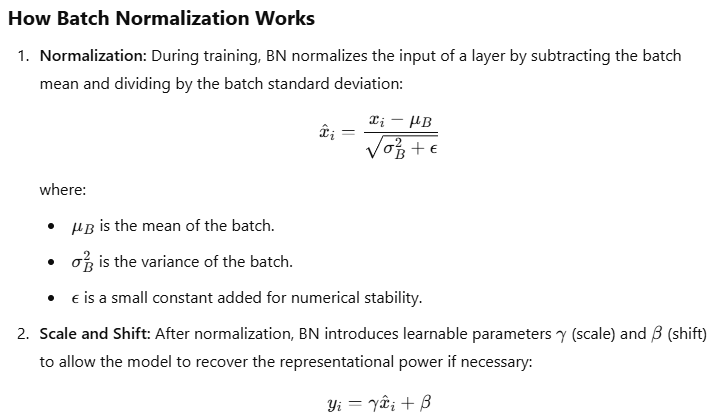



**Benefits of Batch Normalization**  

* Stabilizes Training:  
Reduces the internal covariate shift, where the distribution of inputs to layers changes during training, leading to more stable and faster convergence.  


* Enables Higher Learning Rates:  
Reduces the sensitivity to initialization and allows for larger learning rates, speeding up training.  

* Acts as a Regularizer:  
By introducing noise during mini-batch normalization, BN has a slight regularization effect, sometimes reducing the need for dropout.  

* Improves Gradient Flow:  
Helps prevent vanishing or exploding gradients, especially in deep networks.  

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model3.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu'))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model3.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(1024, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(100, activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,196 (9.38 MB)

 Trainable params: 2,459,748 (9.38 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history3 = model3.fit(train_images, train_labels, epochs=20, validation_split=0.20)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0964 - loss: 4.1962 - val_accuracy: 0.1535 - val_loss: 3.6253
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2353 - loss: 3.1184 - val_accuracy: 0.2869 - val_loss: 2.8824
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3260 - loss: 2.6366 - val_accuracy: 0.3340 - val_loss: 2.6568
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4025 - loss: 2.2839 - val_accuracy: 0.3547 - val_loss: 2.5529
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4658 - loss: 1.9772 - val_accuracy: 0.3697 - val_loss: 2.5543
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5467 - loss: 1.6546 - val_accuracy: 0.4025 - val_loss: 2.4998
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6260 - loss: 1.3298 - val_accuracy: 0.3885 - val_loss: 2.6162
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7001 - loss: 1.0182 -

In [ ]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)

print('\nModel 3 loss using test set:', test_loss)
print('\nModel 3 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4051 - loss: 4.1567

Model 3 loss using test set: 4.154744625091553

Model 3 accuracy using test set: 0.40700000524520874


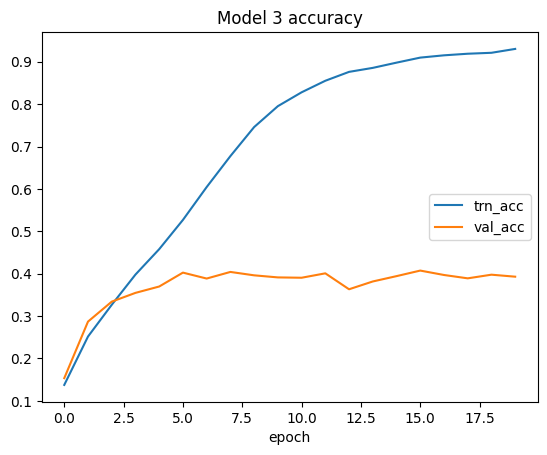

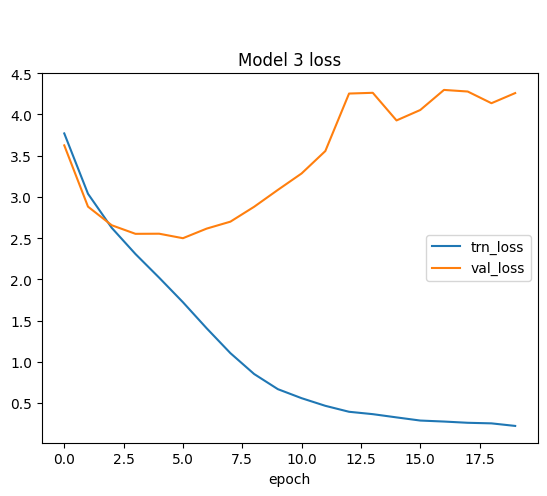

In [ ]:
plt.title('Model 3 accuracy')
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel 3 loss')
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

Comparing model 2 and model 3:  
<br>

|  Measure | Model 2 | Model 3 |
|----------|---------|---------|
| Accuracy | 0.2101  | 0.4051  |
| Loss     | 3.3944  | 4.1567  |

Accuracy is better in model 3 than in model 2.   

---



### Model 4  

Changes:  
* Add one convolutional layer.

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same',
                               activation='relu', input_shape=(32,32,3)))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same',
                               activation='relu'))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same',
                               activation='relu') )
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu') )
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(1024, activation='relu'))
model4.add(keras.layers.Dropout(0.2))
model4.add(keras.layers.Dense(100, activation='softmax'))

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 4, 4, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,232,100 (8.51 MB)

 Trainable params: 2,231,140 (8.51 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history4 = model4.fit(train_images, train_labels, epochs=25, validation_split=0.20)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0886 - loss: 4.1791 - val_accuracy: 0.1270 - val_loss: 3.8934
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2199 - loss: 3.1643 - val_accuracy: 0.2666 - val_loss: 3.0049
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3203 - loss: 2.6335 - val_accuracy: 0.3032 - val_loss: 2.8275
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3933 - loss: 2.2905 - val_accuracy: 0.3230 - val_loss: 2.7159
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4554 - loss: 1.9802 - val_accuracy: 0.3483 - val_loss: 2.6675
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5285 - loss: 1.6743 - val_accuracy: 0.3887 - val_loss: 2.5205
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5993 - loss: 1.3829 - val_accuracy: 0.3764 - val_loss: 2.8226
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6780 - loss: 1.0862 -

In [ ]:
test_loss, test_acc = model4.evaluate(test_images, test_labels)

print('\nModel 4 loss using test set:', test_loss)
print('\nModel 4 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4073 - loss: 4.8491

Model 4 loss using test set: 4.850371837615967

Model 4 accuracy using test set: 0.4058000147342682


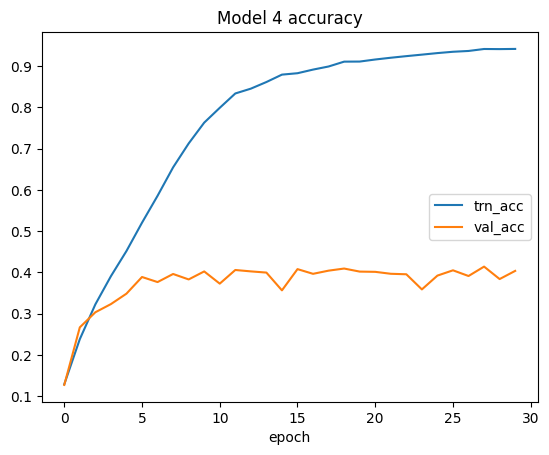

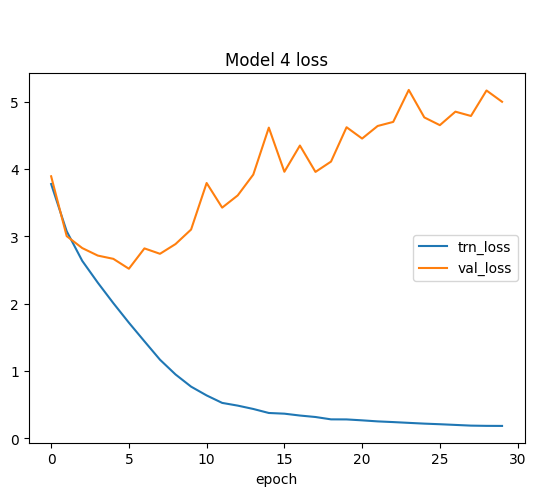

In [ ]:
plt.title('Model 4 accuracy')
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel 4 loss')
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

Comparing model 3 and model 4:  
<br>

|  Measure | Model 3 | Model 4 |
|----------|---------|---------|
| Accuracy | 0.4051  | 0.4073  |
| Loss     | 4.1567  | 4.8491  |

---

### Model 5  

* Reduce kernel_size from 5 to 3  
* Increase dropout from 0.2 to 0.3

In [ ]:
model5 = keras.Sequential()

model5.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model5.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu') )
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model5.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu') )
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model5.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu') )
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(1024, activation='relu'))
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(100, activation='softmax'))

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,542,436 (5.88 MB)

 Trainable params: 1,541,476 (5.88 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history5 = model5.fit(train_images, train_labels, epochs=25, validation_split=0.20)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0857 - loss: 4.2896 - val_accuracy: 0.1351 - val_loss: 3.8261
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2088 - loss: 3.2457 - val_accuracy: 0.2690 - val_loss: 2.9198
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2858 - loss: 2.8171 - val_accuracy: 0.2722 - val_loss: 2.9352
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3387 - loss: 2.5405 - val_accuracy: 0.3611 - val_loss: 2.4870
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3902 - loss: 2.3053 - val_accuracy: 0.3785 - val_loss: 2.3754
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4234 - loss: 2.1300 - val_accuracy: 0.3787 - val_loss: 2.4222
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4674 - loss: 1.9530 - val_accuracy: 0.3941 - val_loss: 2.4373
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5022 - loss: 1.7893 -

In [ ]:
test_loss, test_acc = model5.evaluate(test_images, test_labels)

print('\nModel 5 loss using test set:', test_loss)
print('\nModel 5 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4885 - loss: 2.5716

Model 5 loss using test set: 2.556257963180542

Model 5 accuracy using test set: 0.4869999885559082


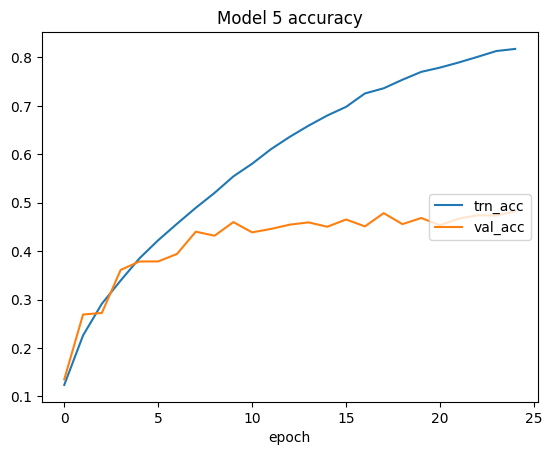

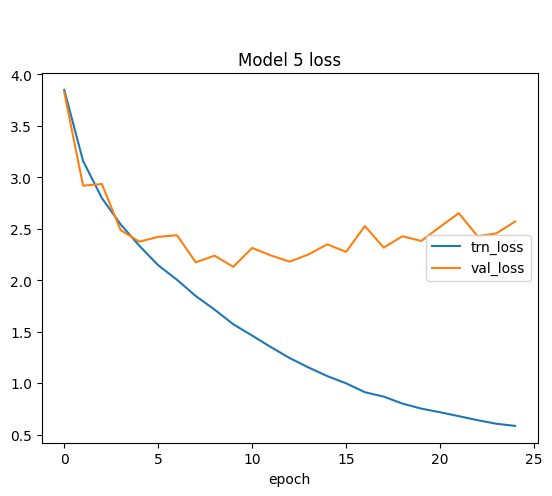

In [ ]:
plt.title('Model 5 accuracy')
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel 5 loss')
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

Comparing model 4 and model 5:  
<br>

|  Measure | Model 4 | Model 5 |
|----------|---------|---------|
| Accuracy | 0.4073  | 0.4885  |
| Loss     | 4.8491  | 2.5716  |  

Model 5 performed better than model 4.  

---  

### Model 6  

* Use Global Average Pooling

In [ ]:
model6 = keras.Sequential()

model6.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model6.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu') )
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model6.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu') )
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model6.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu') )
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model6.add(keras.layers.Conv2D(filters=512, kernel_size=3, padding='same',
                               activation='relu') )
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model6.add(keras.layers.GlobalAveragePooling2D())

model6.add(keras.layers.Dense(100, activation='softmax'))

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model6.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 2, 2, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 2, 2, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,623,844 (6.19 MB)

 Trainable params: 1,621,860 (6.19 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
history6 = model6.fit(train_images, train_labels, epochs=25, validation_split=0.20)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.1309 - loss: 4.0843 - val_accuracy: 0.2420 - val_loss: 3.2778
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3314 - loss: 2.6792 - val_accuracy: 0.3518 - val_loss: 2.6422
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4574 - loss: 2.0492 - val_accuracy: 0.3497 - val_loss: 2.7497
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5649 - loss: 1.5759 - val_accuracy: 0.4186 - val_loss: 2.3489
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6859 - loss: 1.0881 - val_accuracy: 0.3935 - val_loss: 2.7598
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8020 - loss: 0.6674 - val_accuracy: 0.4343 - val_loss: 2.7105
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8705 - loss: 0.4200 - val_accuracy: 0.4149 - val_loss: 3.2211
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9074 - loss: 0.2959 -

In [ ]:
test_loss, test_acc = model6.evaluate(test_images, test_labels)

print('\nModel 6 loss using test set:', test_loss)
print('\nModel 6 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4291 - loss: 4.6829

Model 6 loss using test set: 4.704717636108398

Model 6 accuracy using test set: 0.4259999990463257


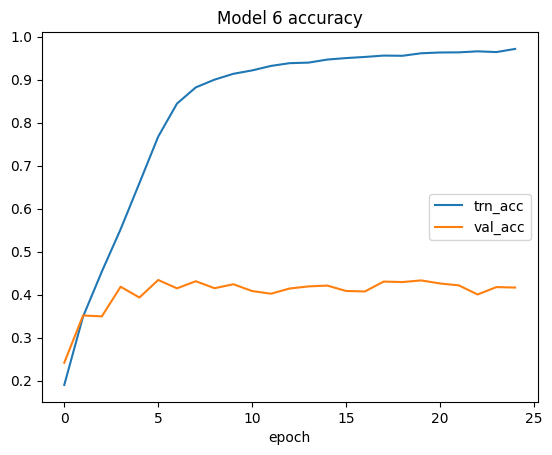

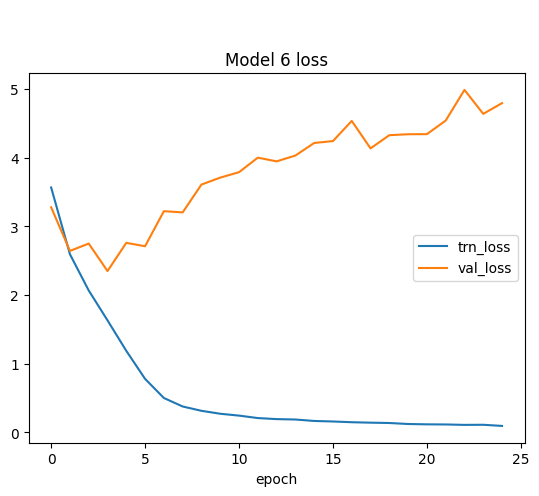

In [ ]:
plt.title('Model 6 accuracy')
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel 6 loss')
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

Comparing model 5 and model 6:  
<br>

|  Measure | Model 5 | Model 6 |
|----------|---------|---------|
| Accuracy | 0.4885  | 0.4291  |
| Loss     | 2.5716  | 4.6829  |  

Model 5 performed better than model 6.  

Changes didn't work.

---

### Model 7  

Changes:  
* Return to model 6 settings, removing Global Average Pooling.  
* Increase dropout to 0.4


In [ ]:
model7 = keras.Sequential()

model7.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model7.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu') )
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model7.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu') )
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model7.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu') )
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model7.add(keras.layers.Flatten())
model7.add(keras.layers.Dropout(0.4))
model7.add(keras.layers.Dense(1024, activation='relu'))
model7.add(keras.layers.Dropout(0.4))
model7.add(keras.layers.Dense(100, activation='softmax'))

model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model7.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,542,436 (5.88 MB)

 Trainable params: 1,541,476 (5.88 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history7 = model7.fit(train_images, train_labels, epochs=25, validation_split=0.20)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0733 - loss: 4.5072 - val_accuracy: 0.1766 - val_loss: 3.4362
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1693 - loss: 3.4775 - val_accuracy: 0.2081 - val_loss: 3.2343
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2333 - loss: 3.1043 - val_accuracy: 0.2614 - val_loss: 2.9880
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2773 - loss: 2.8563 - val_accuracy: 0.3204 - val_loss: 2.6708
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3168 - loss: 2.6282 - val_accuracy: 0.2820 - val_loss: 3.1787
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3584 - loss: 2.4599 - val_accuracy: 0.3660 - val_loss: 2.4850
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3938 - loss: 2.2752 - val_accuracy: 0.3924 - val_loss: 2.3962
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4230 - loss: 2.1259 -

In [ ]:
test_loss, test_acc = model7.evaluate(test_images, test_labels)

print('\nModel 7 loss using test set:', test_loss)
print('\nModel 7 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4659 - loss: 2.3270

Model 7 loss using test set: 2.3564486503601074

Model 7 accuracy using test set: 0.46239998936653137


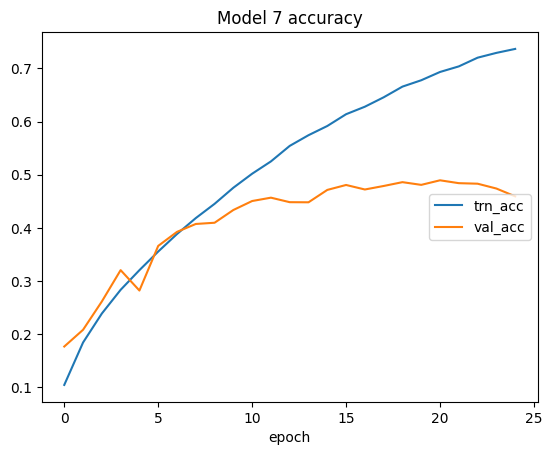

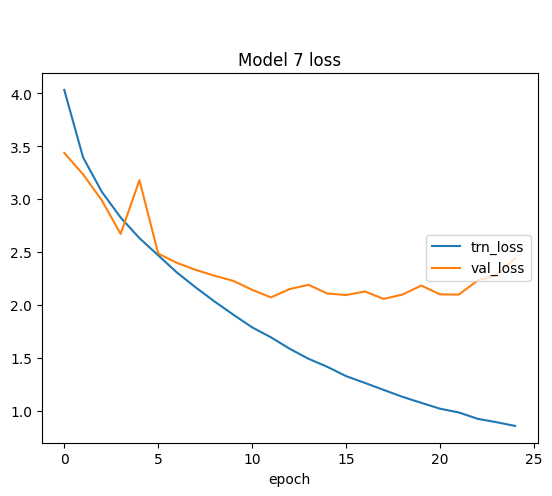

In [ ]:
plt.title('Model 7 accuracy')
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel 7 loss')
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

Comparing model 5 and model 6:  
<br>

|  Measure | Model 5 | Model 6 | Model 7 |
|----------|---------|---------|---------|
| Accuracy | 0.4885  | 0.4291  | 0.4659  |
| Loss     | 2.5716  | 4.6829  | 2.3270  |

Model 5 performed better than model 6 and 7.  

---

### Model 8  

Changes:  
* Insert Global Average Pooling once again.
* Insert dropout to convolutional layers once again.

In [ ]:
model8 = keras.Sequential()

model8.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model8.add(keras.layers.Dropout(0.2))

model8.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu') )
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model8.add(keras.layers.Dropout(0.2))

model8.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu') )
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model8.add(keras.layers.Dropout(0.2))

model8.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu') )
model8.add(keras.layers.BatchNormalization())
model8.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model8.add(keras.layers.Dropout(0.2))


model8.add(keras.layers.GlobalAveragePooling2D())

model8.add(keras.layers.Dense(100,activation="softmax"))

model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model8.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 416,036 (1.59 MB)

 Trainable params: 415,076 (1.58 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history8 = model8.fit(train_images, train_labels, epochs=25, validation_split=0.20)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.1129 - loss: 4.0164 - val_accuracy: 0.2472 - val_loss: 3.0433
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2814 - loss: 2.8881 - val_accuracy: 0.2819 - val_loss: 2.9170
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3565 - loss: 2.5115 - val_accuracy: 0.3493 - val_loss: 2.5510
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4072 - loss: 2.2697 - val_accuracy: 0.2873 - val_loss: 3.0393
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4402 - loss: 2.1046 - val_accuracy: 0.4357 - val_loss: 2.1701
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4689 - loss: 1.9806 - val_accuracy: 0.3776 - val_loss: 2.5055
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4943 - loss: 1.8767 - val_accuracy: 0.3983 - val_loss: 2.3659
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5145 - loss: 1.7833 -

In [ ]:
test_loss, test_acc = model8.evaluate(test_images, test_labels)

print('\nModel 8 loss using test set:', test_loss)
print('\nModel 8 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5130 - loss: 2.0010

Model 8 loss using test set: 1.991986870765686

Model 8 accuracy using test set: 0.512499988079071


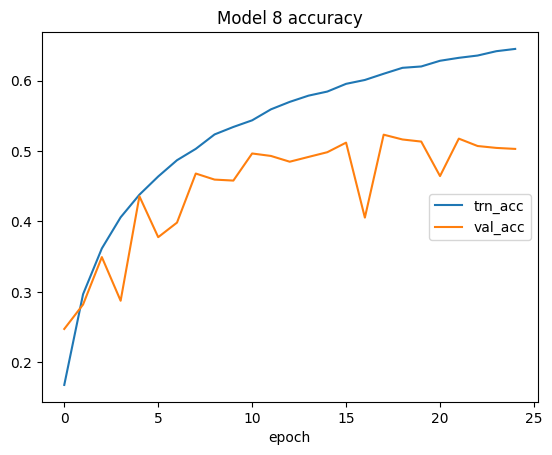

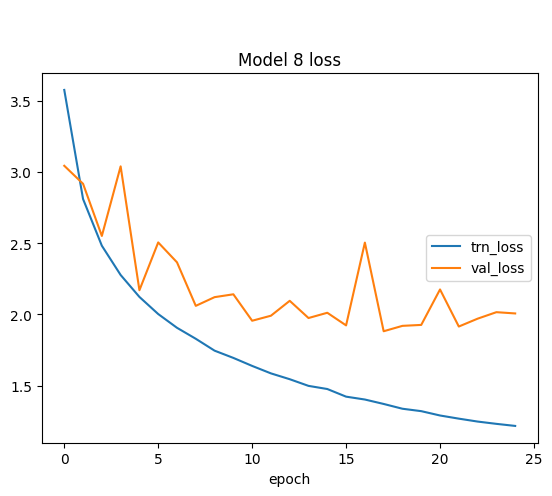

In [ ]:
plt.title('Model 8 accuracy')
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel 8 loss')
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

Comparing models 5 to 8:  
<br>

|  Measure | Model 5 | Model 6 | Model 7 | Model 8 |
|----------|---------|---------|---------|---------|
| Accuracy | 0.4885  | 0.4291  | 0.4659  | 0.5130  |
| Loss     | 2.5716  | 4.6829  | 2.3270  | 2.0010  |

Model 8 performed better than all others.  

---

### Model 9  

Changes:  
* Increase dropout to 0.3

In [ ]:
model9 = keras.Sequential()

model9.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model9.add(keras.layers.Dropout(0.3))

model9.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu') )
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model9.add(keras.layers.Dropout(0.3))

model9.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu') )
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model9.add(keras.layers.Dropout(0.3))

model9.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu') )
model9.add(keras.layers.BatchNormalization())
model9.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model9.add(keras.layers.Dropout(0.3))


model9.add(keras.layers.GlobalAveragePooling2D())

model9.add(keras.layers.Dense(100,activation="softmax"))

model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 416,036 (1.59 MB)

 Trainable params: 415,076 (1.58 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
history9= model9.fit(train_images, train_labels, epochs=35, validation_split=0.20)

Epoch 1/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0872 - loss: 4.2058 - val_accuracy: 0.1498 - val_loss: 3.7294
Epoch 2/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2269 - loss: 3.1657 - val_accuracy: 0.2305 - val_loss: 3.1477
Epoch 3/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2982 - loss: 2.7949 - val_accuracy: 0.2696 - val_loss: 2.9973
Epoch 4/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3433 - loss: 2.5690 - val_accuracy: 0.3265 - val_loss: 2.7006
Epoch 5/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3783 - loss: 2.4054 - val_accuracy: 0.3684 - val_loss: 2.4818
Epoch 6/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3995 - loss: 2.3092 - val_accuracy: 0.3972 - val_loss: 2.3166
Epoch 7/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4209 - loss: 2.2025 - val_accuracy: 0.4205 - val_loss: 2.2768
Epoch 8/35
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4324 - loss: 2.1525 -

In [ ]:
test_loss, test_acc = model9.evaluate(test_images, test_labels)

print('\nModel 9 loss using test set:', test_loss)
print('\nModel 9 accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5042 - loss: 1.9503

Model 9 loss using test set: 1.9394972324371338

Model 9 accuracy using test set: 0.49799999594688416


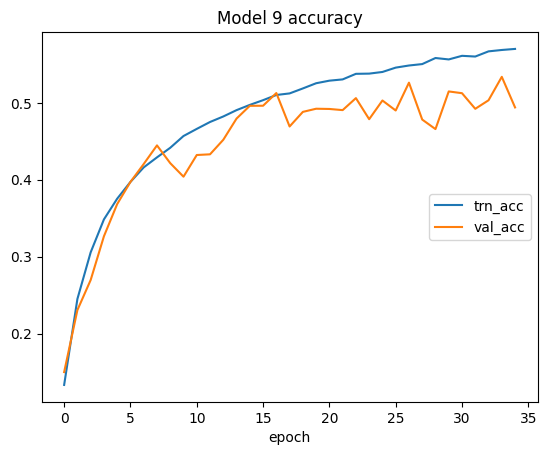

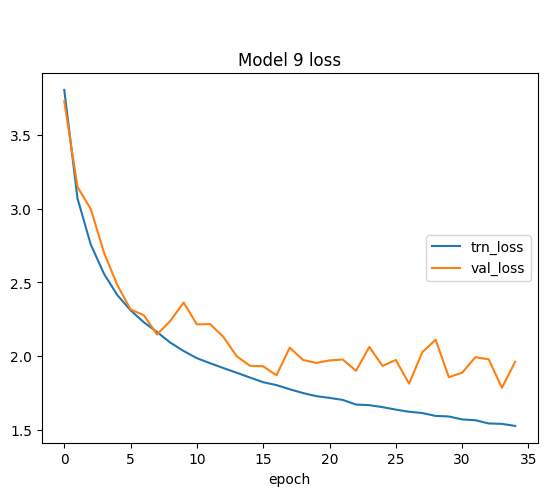

In [ ]:
plt.title('Model 9 accuracy')
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel 9 loss')
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

<br>

Model 9 performed better than all others.  


#### Save Model 9  


In [ ]:
keras.models.save_model(model9, 'CNN_final_model_v1.keras')
files.download('CNN_final_model_v1.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

<br>

### Refine Model 9  

#### Embed model 9 in a function

In [ ]:
def CNN_model():

  model9 = keras.Sequential()

  model9.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                               activation='relu', input_shape=(32,32,3)) )
  model9.add(keras.layers.BatchNormalization())
  model9.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
  model9.add(keras.layers.Dropout(0.3))

  model9.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                               activation='relu') )
  model9.add(keras.layers.BatchNormalization())
  model9.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
  model9.add(keras.layers.Dropout(0.3))

  model9.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                               activation='relu') )
  model9.add(keras.layers.BatchNormalization())
  model9.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
  model9.add(keras.layers.Dropout(0.3))

  model9.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu') )
  model9.add(keras.layers.BatchNormalization())
  model9.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
  model9.add(keras.layers.Dropout(0.3))

  model9.add(keras.layers.GlobalAveragePooling2D())

  model9.add(keras.layers.Dense(100,activation="softmax"))

  model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return (model9)

In [ ]:
model = CNN_model()

meus_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.keras'
    )
]

history = model.fit(train_images, train_labels, epochs=25,
                    validation_split=0.2,
                    callbacks = meus_callbacks)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0912 - loss: 4.1740 - val_accuracy: 0.1516 - val_loss: 3.8113
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2306 - loss: 3.1379 - val_accuracy: 0.2818 - val_loss: 2.9203
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3012 - loss: 2.7760 - val_accuracy: 0.3384 - val_loss: 2.5903
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3484 - loss: 2.5329 - val_accuracy: 0.3637 - val_loss: 2.4952
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3745 - loss: 2.4055 - val_accuracy: 0.3580 - val_loss: 2.5665
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4026 - loss: 2.2854 - val_accuracy: 0.4187 - val_loss: 2.2096
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4252 - loss: 2.1794 - val_accuracy: 0.2813 - val_loss: 3.0636
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4403 - loss: 2.1072 -

#### Change Learning Rate from Model 9

In [ ]:
model = CNN_model()

meus_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, # new_lr = lr * 0.1
                                      patience=3, min_lr = 0.0001),
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.keras'
    )
]

history = model.fit(train_images, train_labels, epochs=25,
                    validation_split=0.2,
                    callbacks = meus_callbacks)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0921 - loss: 4.1945 - val_accuracy: 0.2105 - val_loss: 3.2616 - learning_rate: 0.0010
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2247 - loss: 3.1462 - val_accuracy: 0.2854 - val_loss: 2.8915 - learning_rate: 0.0010
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2971 - loss: 2.7937 - val_accuracy: 0.3111 - val_loss: 2.7960 - learning_rate: 0.0010
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3450 - loss: 2.5578 - val_accuracy: 0.3634 - val_loss: 2.4889 - learning_rate: 0.0010
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3778 - loss: 2.3982 - val_accuracy: 0.4070 - val_loss: 2.2780 - learning_rate: 0.0010
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4060 - loss: 2.2710 - val_accuracy: 0.3939 - val_loss: 2.3810 - learning_rate: 0.0010
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4180 - 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nModel loss using test set:', test_loss)
print('\nModel accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5099 - loss: 1.8803

Model loss using test set: 1.8703927993774414

Model accuracy using test set: 0.5087000131607056


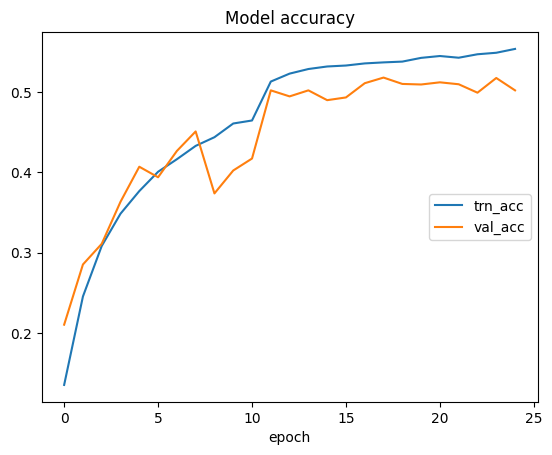

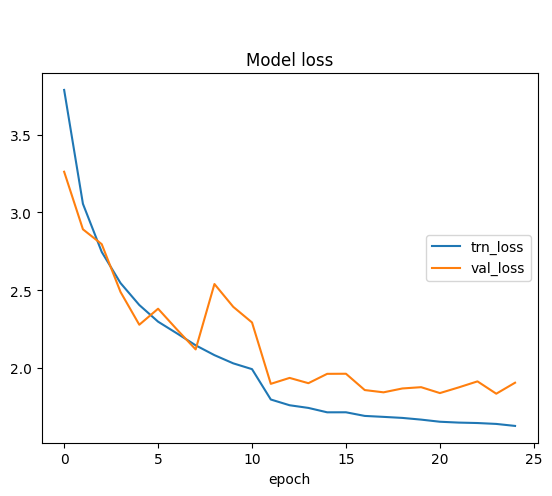

In [ ]:
plt.title('Model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

In [ ]:
files.download('CNN_final_model_v2.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
<br>

### Perform Data Augmentation

#### Creating data augmentation pipeline

In [ ]:
seq = iaa.Sequential([
    iaa.Fliplr(0.2),
    iaa.Crop(percent=(0, 0.1)),
    iaa.Sometimes(
        0.1,
        iaa.GaussianBlur(sigma=(0, 0.25))
    ),
    iaa.Affine(
        scale={"x": (0.4, 0.6), "y": (0.4, 0.6)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-10, 10),
        shear=(-4, 4)
    )
], random_order=True)

`iaa.Sequential([`  
Combines a series of augmentation techniques into a single pipeline. The augmentations are applied in a specific order or optionally in random order (as specified by `random_order=True`).  

`iaa.Fliplr(0.2)`  
Applies a horizontal flip to 20% of the images (probability of 0.2).  

`iaa.Crop(percent=(0, 0.1))`  
Randomly crops up to 10% of the image on each side. If percent=(0, 0.1), the amount of cropping is randomly chosen between 0% and 10% of the image's dimensions.  

`iaa.Sometimes(0.1, iaa.GaussianBlur(sigma=(0, 0.25)))`
Applies a Gaussian blur with a random standard deviation (𝜎) between 0 and 0.25 to 10% of the images (probability of 0.1).  
The `Sometimes` function ensures this augmentation is applied conditionally.  

`iaa.Affine(...)`  
* Applies affine transformations to the images, including:  
  * Scaling (zoom in or out): Randomly scales the image horizontally (x) and vertically (y) by a factor between 0.4 and 0.6.  
  * Translation (movement): Moves the image randomly along the x-axis and y-axis by up to ±10% of the image's size.  
  * Rotation: Rotates the image randomly within a range of -10 to +10 degrees.  
  * Shear: Shears the image randomly within a range of -4 to +4 degrees.  
    > Shear is a type of geometric transformation used in image processing and computer vision to distort the shape of an image along one axis while keeping the other axis fixed. This transformation skews the image so that the objects within it appear slanted or tilted.  

`random_order=True`  
Ensures that the augmentations listed in the `Sequential` block are applied in random order for each image, further diversifying the augmentations.

#### Split data between training and test sets

In [ ]:
train_images, X_val, train_labels, Y_val = train_test_split(
    train_images, train_labels, test_size=0.2)

#### Generate random images that will be stored **in memory**

In [ ]:
for i in range(3):
  train_images = np.vstack( (train_images,
                             seq.augment_images(train_images[:40000])))
  train_labels = np.vstack( (train_labels, train_labels[:40000]) )

`for i in range(3)`  
The loop runs 3 times, which means the augmentation process will be repeated 3 times.  

Original size: 𝑁 (number of images)    
After 1 iteration: 𝑁 + 40000  
After 3 iterations: 𝑁 + 40000 × 3  

`seq.augment_images(train_images[:40000])`  
> `train_images[:40000]:`  
Selects the first 40,000 images from the train_images dataset for augmentation.  
`seq.augment_images(...)`  
Uses the augmentation pipeline seq (likely defined earlier using imgaug) to apply random transformations to the selected 40,000 images.  

`train_images = np.vstack((train_images, seq.augment_images(train_images[:40000])))`  
>`np.vstack(...)`  
Vertically stacks the augmented images with the existing train_images. This effectively increases the size of train_images by appending the augmented images.  

`train_labels = np.vstack((train_labels, train_labels[:40000]))`  
>`train_labels[:40000]`  
Selects the labels corresponding to the first 40,000 images.  
`np.vstack(...)`  
Vertically stacks these labels with the existing train_labels so that the augmented images retain their corresponding labels.


#### How many images and labels are available now ?

In [ ]:
print("Total images: ", train_images.shape)
print("Total labels: ", train_labels.shape)

Total images:  (160000, 32, 32, 3)
Total labels:  (160000, 1)


### Retrain model using the augmented dataset

#### Load saved model

In [ ]:
#model = keras.models.load_model('best_model.keras')

model = CNN_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 416,036 (1.59 MB)

 Trainable params: 415,076 (1.58 MB)

 Non-trainable params: 960 (3.75 KB)

#### Create pipeline to monitor model training

In [ ]:
training_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                      patience=3, min_lr = 0.0001),
    keras.callbacks.ModelCheckpoint(
        save_best_only = True,
        filepath='best_model.keras'
    )
]

`keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)`  

* Stops the training early if the validation loss (val_loss) does not improve for a specified number of epochs. It prevents overfitting by stopping when the model stops improving.  
* Key Parameters:  
  * monitor='val_loss': Watches the validation loss to determine improvement.  
  * patience=5: Waits for 5 epochs without improvement before stopping the training.  


`keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)`
* Reduces the learning rate when the validation loss plateaus (stops improving).  
* Key Parameters:  
  * `monitor='val_loss'`: Monitors the validation loss.  
  * `factor=0.1`: Scales the learning rate by this factor (e.g., if the current learning rate is 0.01, it becomes 0.001 when triggered).  
  * `patience=3`: Waits for 3 epochs of no improvement before reducing the learning rate.  
  * `min_lr=0.0001`: Ensures the learning rate does not go below this value.  

`keras.callbacks.ModelCheckpoint(save_best_only = True, filepath='best_model.keras')`
* Saves the model to a file whenever the validation loss improves.  
* Key Parameters:  
`save_best_only=True`: Ensures that only the model with the best validation loss is saved.  
`filepath='best_model.keras'`: Specifies the file path where the model will be saved.  

<br>


In [ ]:
history = model.fit(train_images, train_labels, epochs=25,
                    validation_data = (X_val, Y_val),
                    callbacks = training_callbacks)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nModel loss using test set:', test_loss)
print('\nModel accuracy using test set:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 1.8485

Model loss using test set: 1.8452340364456177

Model accuracy using test set: 0.510200023651123


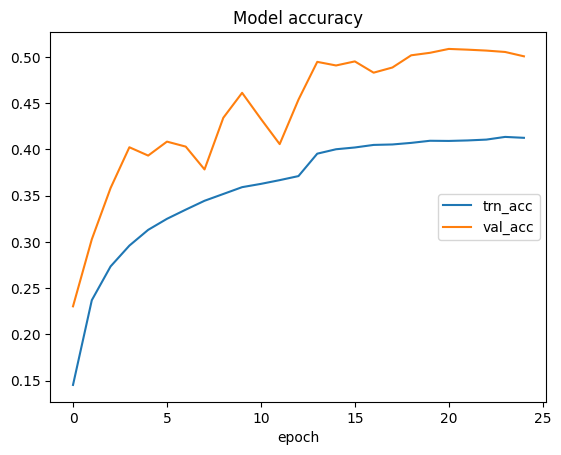

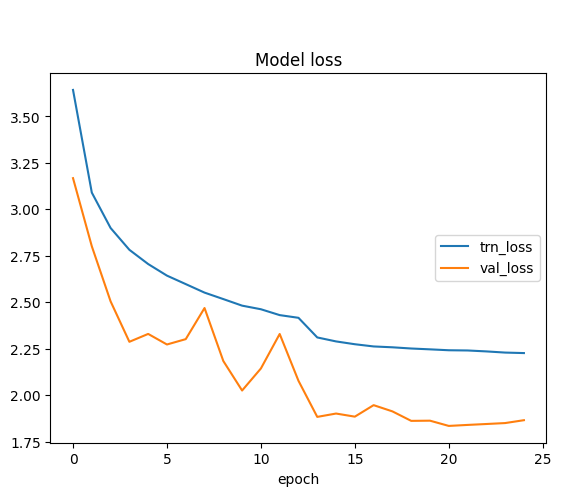

In [ ]:
plt.title('Model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['trn_acc', 'val_acc'], loc='center right')
plt.show()

plt.title('\n\nModel loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['trn_loss', 'val_loss'], loc='center right')
plt.show()

### Conclusion:  

At this point, we have a model that has been significantly improved compared to its first version. Despite all the techniques used, it is clear that an accuracy of about 50% is a limit, and no matter what is done, no significant improvement is observed.  
When this happens, using a pre-trained model can be a good choice.  

